# Announcements
- __Please familiarize yourself with the term projects, and sign up for your (preliminary) choice__ using [this form](https://forms.gle/ByLLpsthrpjCcxG89). _You may revise your choice, but I'd recommend settling on a choice well before Thanksgiving._
- Problem Set 5 posted on D2L, due Oct 20.
- __Outlook__: algorithms for non-linear equations; then Boundary Value Problems and Partial Differential Equations.
- Conference for Undergraduate Women in Physics: online event in 2021, [applications accepted until 10/25](https://www.aps.org/programs/women/cuwip/)
- TIMESTEP on 10/21 at 5pm: Grad School Application Process [details + zoom registration](https://lavinia.as.arizona.edu/~timestep/)

# QR Decomposition Example
In today's breakout room exercise, we will implement the __Householder Triangularization__ (Lecture 21). Here's a summary of our derivation:

Householder multiplies $A$ on the left by unitary matrices $Q_k$, 

$$
    Q_n Q_{n-1} \quad \cdots \quad Q_2 Q_1 A = R \,.
$$

We can think of Householder triangularization as one of introducing zeros into $A$ via orthogonal matrices.

The construction of $Q_k$ is usually broken down into a matrix of the form

$$
    Q_k = \begin{bmatrix} I & 0 \\ 0 & F \end{bmatrix}
$$

where $I \in \mathbb C^{k-1 \times k-1}$ identity matrix and $F \in \mathbb C^{m - (k - 1) \times m - (k-1)}$ unitary matrix. We derived in Lecture 21 that

$$
    F = I - 2 \frac{\vec{v_k} \vec{v_k}^\ast}{\vec{v_k}^\ast \vec{v_k}}
$$
with  $v_k = ||\vec{x_k}|| \hat{e}_1 - \vec{x_k}$.

_There is actually a non-uniqueness to which direction we reflect over since another definition of $\hat{H}$ which is orthogonal to the one we originally choose is available.  For numerical stability purposes we will choose the reflector that is the most different from $\vec{x}$.  This comes back to having difficulties numerically when the vector $\vec{x_k}$ is nearly aligned with $\hat{e}_1$ and therefore one of the $H$ specification.  By convention the $\vec{v_k}$ cis defined by_

$$
    v_k = \text{sign}(x_{k,1}||\vec{x_k}|| \hat{e}_1 + \vec{x_k}.
$$


In [13]:
import numpy
# Implementation of Householder QR Factorization
def householder_QR(A, verbose=False):
    m, n = A.shape
    Q = numpy.zeros(A.shape)
    v = numpy.empty(A.shape)
    m, n = A.shape
    R = A.copy()
    for k in range(n):
    #calculate normalized v_k = v[k:,k]
        x = R[k:, k]
        e1 = numpy.zeros(x.shape)
        e1[0] = 1.0
        v[k:, k] = 
    #calculate updated R_k 
        R[k:, k:] -= 2.0 * numpy.dot(numpy.outer(v[k:, k], v[k:, k]), R[k:, k:])

    # Form Q
    for k in range(n):
        ek = numpy.zeros(m)
        #ek is the k-th unit vector
        ek[k] = 1.0
        for j in range(n - 1, -1, -1):
            #now apply successive reflections
            ek[j:m] -= 2.0 * numpy.dot(numpy.outer(v[j:, j], v[j:, j]), ek[j:m])
        Q[:, k] = en
        
    return Q, R

A = numpy.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]], dtype=float)
print("Matrix A = ")
print(A)
m, n = A.shape
Q, R = householder_QR(A, verbose=False)
print("Householder Q = ")
print(Q)
print("Householder R = ")
print(R)

print("Check to see if factorization worked...")
print(numpy.abs(A - numpy.dot(Q, R[:n, :n])))

SyntaxError: invalid syntax (<ipython-input-13-674040816b68>, line 14)

#### Example:   Random Matrix QR

Consider a matrix $A$ with a random eigenspace and widely varying eigenvalues.  The values along the diagonal of $R$ gives us some idea of the size of the projections as we go, i.e. the larger the values the less effective we are in constructing othorgonal directions.

We will now compare the classic Gram-Schmidt iteration `classic_GS` (Lecture 20) to your Householder triangulaziation:

In [11]:
# Classical Gram-Schmidt Iteration (Lecture 20)
def classic_GS(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = numpy.empty((m, n))
    R = numpy.zeros((n, n))
    for j in range(n):
        v = A[:, j]
        for i in range(j):
            R[i, j] = numpy.dot(Q[:, i].conjugate(), A[:, j])
            v = v - R[i, j] * Q[:, i]
        R[j, j] = numpy.linalg.norm(v, ord=2)
        Q[:, j] = v / R[j, j]
    return Q, R


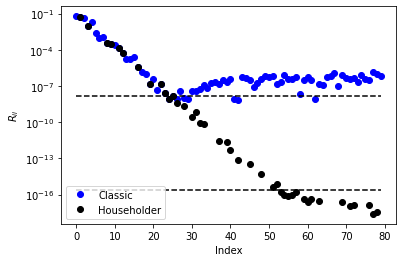

In [12]:
import matplotlib.pyplot as plt
N = 80
U, X = numpy.linalg.qr(numpy.random.random((N, N)))
V, X = numpy.linalg.qr(numpy.random.random((N, N)))
S = numpy.diag(2.0**numpy.arange(-1.0, -(N + 1), -1.0))
A = numpy.dot(U, numpy.dot(S, V))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
Q, R = classic_GS(A)
axes.semilogy(numpy.diag(R), 'bo', label="Classic")
Q, R = householder_QR(A)
axes.semilogy(numpy.diag(R), 'ko', label="Householder")

axes.set_xlabel("Index")
axes.set_ylabel("$R_{ii}$")
axes.legend(loc=3)
axes.plot(numpy.arange(0, N), numpy.ones(N) * numpy.sqrt(numpy.finfo(float).eps), 'k--')
axes.plot(numpy.arange(0, N), numpy.ones(N) * numpy.finfo(float).eps, 'k--')

plt.show()